# Data cleaning and analysis: Telecom Churning
So we're going to do some data cleaning and analysis. So far we only know data cleaning, so the analysis stuff will definitely be complicated and you'll be lost. Don't worry and just following along when I explain 'exploratory data analysis' and when we're doing the code, just code along. You don't need to understand everything about the analysis phase, as we're just focusing on data cleaning, and getting you a little used to analysis.


## What is telecom churning?
Telecom churn, aka customer churn/attrition, refers to the loss of customers by a telecommunications company, such as a mobile phone carrier, ISP, or cable company. It's critical for businesses to know this as it denotes how many customers discontinue their service over a given period.
### Key definitions
- Churn rate: The percentage of customers who leave a service provider over a specific period. It's often calculated monthly or annually.
- Churn: Refers to the departure of customers from a telecom service.
### Impact
- Revenue loss by losing customers.
- Cost of money by trying to get new customers via advertising and marketing.
- Customer lifetime value is lost, which means the total money a company can expect from a customer over their lifetime is decreased.
Alright now that we know a little about what's happening and the data that we're dealing with, let's start practicing data cleaning and whatnot.

## EDA (Exploratory Data Analysis)
A step in the data analysis process that involves summarizing and visualizing data to understand its main characteristics, identify patterns, spot anomalies, and test hypotheses. It's typically the first stage in analyzing a dataset before applying a more complex statistical or machine learning method. I mean, as humans we gotta at least understand what the data is saying before we apply a tool to it.

### Key Goals of EDA:
1. **Understand the Data Structure**:
   - **Data Types**: Identify the types of data (e.g., numeric, categorical, datetime).
   - **Basic Statistics**: Calculate basic statistics like mean, median, standard deviation, and range.
2. **Identify Patterns and Relationships**:
   - **Correlations**: Explore relationships between variables (e.g., using scatter plots or correlation matrices).
   - **Trends**: Look for trends over time or across different categories.
3. **Detect Anomalies and Outliers**:
   - **Outliers**: Identify data points that differ significantly from the rest.
   - **Anomalies**: Spot any unexpected or unusual patterns that might need further investigation.
4. **Check Data Quality**:
   - **Missing Values**: Assess the amount and pattern of missing data.
   - **Duplicates**: Identify and handle duplicate records.
   - **Consistency**: Ensure data is consistent and follows expected formats.
5. **Generate Hypotheses**:
   - **Initial Insights**: Formulate initial hypotheses or questions based on the visual and statistical exploration of the data.
### Common EDA Techniques:
1. **Descriptive Statistics**:
   - Summary statistics: mean, median, mode, standard deviation.
   - Distribution of data: histograms, box plots.
2. **Visualization**:
   - **Histograms**: Show the distribution of a single variable.
   - **Box Plots**: Visualize the spread of our data. Allowing us to also identify outliers.
   - **Scatter Plots**: Examine relationships between two variables and examine the correlation.
   - **Pair Plots**: Explore relationships between multiple variables. Allows us to see all of those scatter plots at the same time
   - **Heatmaps**: Shows the relationship between two variables. By observing the cell colors, we can attempt to see if there are any patterns in value for one or both variables.
3. **Data Cleaning**:
   - **Handling Missing Data**: Techniques for imputing or removing missing values.
   - **Data Transformation**: Normalizing or scaling data, encoding categorical variables.

4. **Categorical Analysis**:
   - **Frequency Counts**: Count occurrences of different categories.
   - **Bar Plots**: Visualize the distribution of categorical variables.

### Tools for EDA:
- **Python Libraries**: `pandas` for data manipulation, `matplotlib` and `seaborn` for visualization, `numpy` for numerical operations.
- **R Libraries**: `dplyr` for data manipulation, `ggplot2` for visualization.
- **Software**: Jupyter notebooks, RStudio, or interactive tools like Tableau or Power BI.

### Example Workflow for EDA:
1. **Load Data**: Import your dataset using tools like `pandas`.
2. **Summarize Data**: Use methods like `df.describe()` and `df.info()` in Python. As a result you can get summary statistics and also the data types
3. **Visualize Data**: Create plots using `matplotlib` or `seaborn` to understand distributions and relationships.
4. **Clean Data**: Address missing values, outliers, normalization, etc. Refer to the `data_cleaning.md` if you forget what to do
5. **Explore Relationships**: Use scatter plots and correlation matrices to identify patterns.
EDA helps in making informed decisions about subsequent data analysis or modeling steps, ensuring that any assumptions or techniques used are appropriate for the dataset at hand.

## Data analysis stages
- EDA: Explores data through visual and statistical methods. This is where you ask questions, perform initial tests, and prepare the data. 
- Confirmatory data analysis: Testing a hypothesis formally and quantifying relationships.
- Predictive Modeling: Involves building and evaluating models to make predictions.
- Interpreting and reporting: Summarizing results and providing actionable insights. Essentially, show people what we found and provide suggestions/arguments for taking certain actions.

In [1]:
# Run this cell for setting up imports and CSV

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from IPython.display import display

telecom_customer_df = pd.read_csv("../../data/telecom.csv")

In [5]:
colors = ['#4D3425','#E4512B']

# Convert 'TotalCharges' to numeric, with errors='coerce'
newTotalCharges = pd.to_numeric(telecom_customer_df['TotalCharges'], errors="coerce")

# Create a boolean filter for rows with 'TotalCharges', where the conversion resulted in NaN
isNaFilter = newTotalCharges.isna()

# Filter the original DataFrame using this boolean filter
invalid_rows = telecom_customer_df[isNaFilter]

# Display the rows that couldn't be converted; maybe they can be fixed?
invalid_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
'''
+ Handling missing values and also doing type conversions. This is a main step in cleaning 
the data and making sure it's transformed in a way that makes it more easily representable.

- NOTE:
Here we really aren't considering duplicate values. I mean it's kind of wrong to do so, like I mean there is a decent 
chance for two or multiple customers to have the same information since there are a lot of categorical data. Like I mean 
if we included 'full name', 'age', and 'address' (columns that are a little more unique) then maybe duplicate checks would 
be required. So just assume for now everything's good.

Also not a lot of cross-field validation, as in this context, each column could be right. Like there's no 'isMarried' or 
'age' column in which we can check 'Hey this guy is under 18, they can't be married!'. 

Also not a lot of imputation since only the 'TotalCharges' was missing, and it's not as straight forward as doing MonthlyCharges 
multiplied by 12 to get the total charges for a year or something. So you can just drop those instead of trying to derive or guesstimate.
'''

# Checking the data types of our columns
telecom_customer_df.dtypes

# 1. Convert 'TotalCharges' to a numeric datatype that we can use to do math with! For non-convertible values
telecom_customer_df['TotalCharges'] = pd.to_numeric(telecom_customer_df['TotalCharges'], errors="coerce")

# 2. Gives us the count of the total number of missing values in every series/column. There's 11 columns where 
# the 'TotalCharges' column is null. Honestly just dropping 11 rows shouldn't be an issue since we have over 7000, so 
# it seems we got lucky this time.
telecom_customer_df.isna().sum()

# 3. Drop the 11 rows with missing values. 
telecom_customer_df.dropna(inplace=True)

# 4. Removing customer IDs from the dataset. We don't need them, but we'll just create a new DataFrame to reflect this change since it's kind of major.
# Here we select all rows with the first parameter, then with the second one we just want column indexes from 1 to end, which excludes column 0 (customer ID)
df2 = telecom_customer_df.iloc[:, 1:]

'''
5. Churn column has 'Yes' or 'No' values, so replace them with their binary numeric values. You can 
do this as sometimes it's going to make it easier to use. I did unique to see all of the possible 
values and to ensure that there are only 'Yes' or 'No' values in the series.

As well as this we created 
'''
df2['Churn'].unique()
df2['Churn'] = df2["Churn"].replace(
  {
    "Yes": 1,
    "No": 0
  }
)

# Step 6: Explicitly convert 'Churn' to boolean type 
df2['Churn'] = df2['Churn'].astype(bool)


'''
7. Convert all categorical variables into 'dummy' variables.

+ Categorical variables:
- Variables that take on a limited/discrete number of possible values. These of them as labels, groups, or enums.
For example, 'gender' and 'Contract' seem like obvious categorical variables. 

+ Dummy Variables:
- Dummy variables (aka one-hot encoding) are binary columns (0 or 1) that represent the value of 
a categorical variables, or main. For example, our gender column has values 'Male' or 'Female'. Then the 
'pd.get_dummies()' would programmatically create two new series 'gender_Male' and 'gender_Female'.
If a row corresponds to a male, it would have 1 (boolean) in the 'gender_Male' column and '0' in 'gender_Female' column.

Another example is doing this on the 'MultipleLines' series that has three values: 'No phone service', 'No', 'Yes'.
This would in turn create 3 different boolean columns:
1. MultipleLines_No                              
2. MultipleLines_No phone service                
3. MultipleLines_Yes

This can be pretty useful as now we have a way to numerically tell which category it is.
Like sometimes we may prefer representing gender as '1' or '0'. But the altnerative is that 
things could be a little more clear if we had columns boolean columns gender_Male or gender_Female
to make things clear for us! 

+ pandas.get_dummies() simply converts all object-type columns (strings) into dummy variables, 
regardless of whether they truly represent categorical data. However, you control which columns
get converted by specifying them or filtering out unwanted ones beforehand. It doesn’t actually decide
whether a column "should" be categorical or not. Instead, it leaves the decision to you, assuming
that any string column might be categorical unless you exclude it.
In this case, assume that all of our object-type columns are categorical, so it's safe to
just call 'pd.get_dummies()' on the entire thing and not worry about it.

The reason we convert categorical data to numerical is that in the future when you're using stuff like machine learning 
or other predictive statistical models, they don't like to use 'string' like 'Male' or 'Female' but rather 
numerical input. I mean we, see the benefit of this in the next section when we calculate correlation values.
'''
df_dummies = pd.get_dummies(df2)


C:\Users\KNguy\AppData\Local\Temp\ipykernel_1908\4205371649.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Churn'] = df2["Churn"].replace(


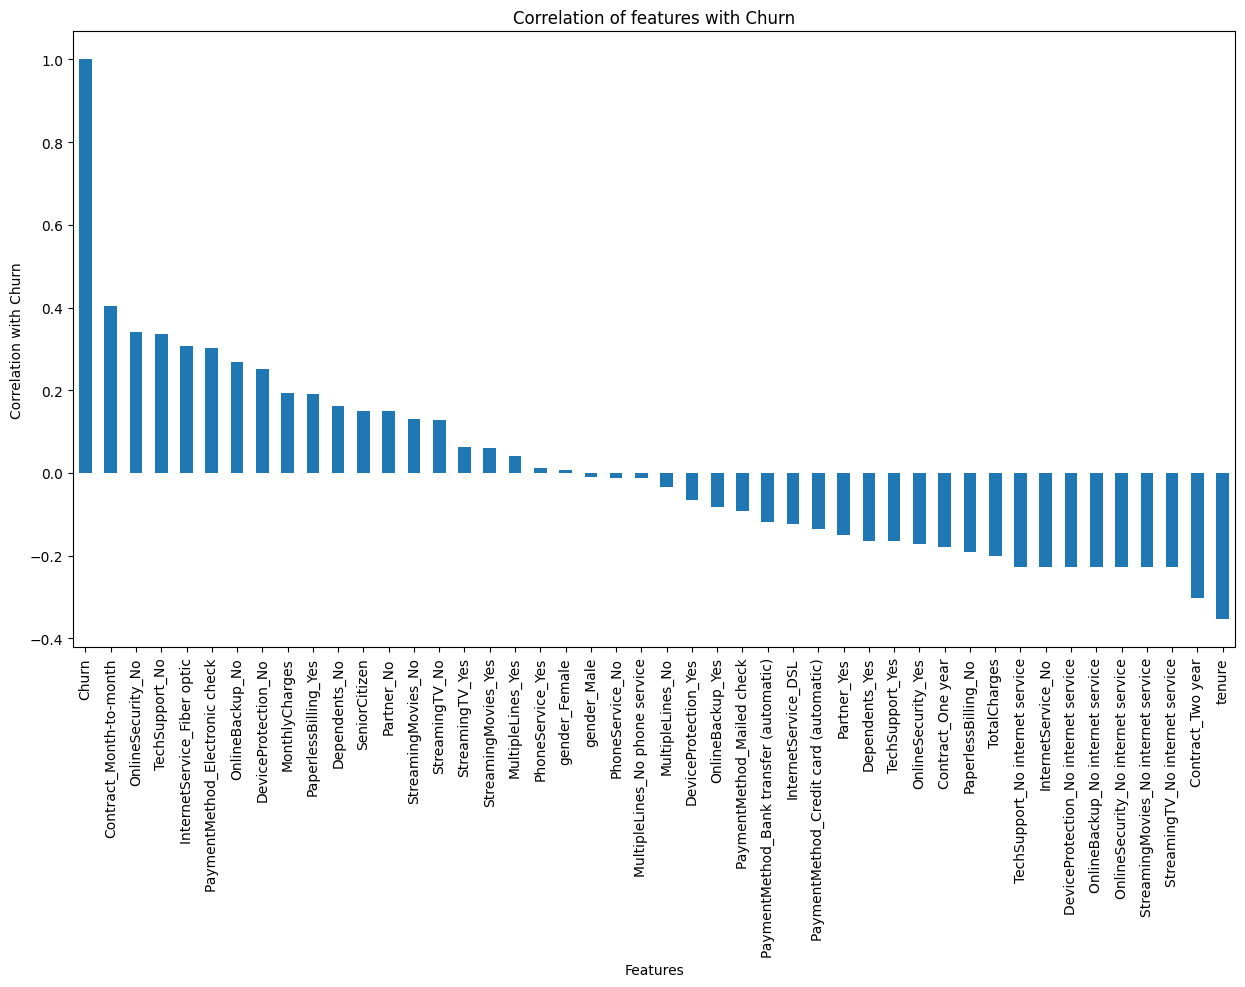

In [17]:
'''
- Data cleaning stage is mostly done. Now let's do some data visualization, and also exploration!

- Visualization 1:

'''

'''
+ 1. Correlation: 
This sets up the size of the figure to be larger and more readable. However the main thing is we're doing computing 
the 'correlation matrix' for all columns. Simply the matrix shows the 'Pearson correlation coefficient' 'r' that's 
used in linear regression and scatter plots. Then we plot that series data in a bar chart.

After computing the correlation matrix, we're selecting the correlation values for the 'Churn' column. So this returns us 
back a series where each value represents hte correlation between 'Churn' and each other column in the DataFrame. So obviously Churn with 
itself is 1, because it's the same idea.

+ Interpretation
So churning means leaving, so a positive correlation isn't good. Month to month contracts, absence of online security, and 
not having tech support seem to be positively correlated with churn. This makes sense, as a bad experience can lead to someone 
not using their service anymore. Whilst having services such as online security, streaming tcc, online
backup, and tech support without internet connection seem negatively correlated with churn. This makes sense as it makes sense for 
a customer that has a good experience to not stop using a service.
'''
plt.figure(figsize=(15,8))
churn_correlation_series = df_dummies.corr()['Churn'].sort_values(ascending=False)
churn_correlation_series.plot(kind="bar")

plt.title("Correlation of features with Churn")
plt.xlabel("Features")
plt.ylabel("Correlation with Churn")
plt.show()

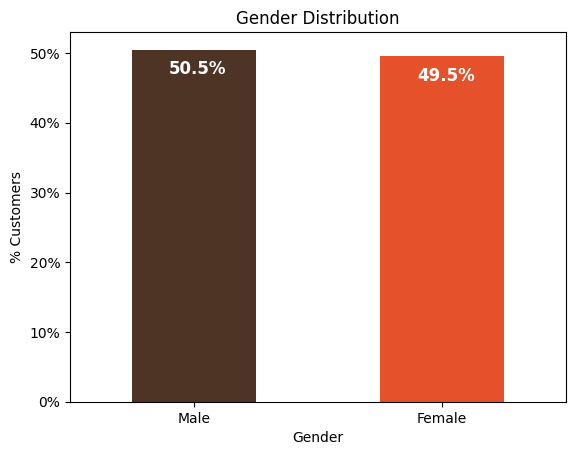

In [7]:
'''
2. Data Exploration Continued:
Let's better understand our data and try to form a hypothesis. We're going to have a lot of
different plots so let's get this over with.

A. Demographics: Let's analyze the gender, age range, partner, and dependent status of our customers. Anyways 
'''
colors = ['#4D3425','#E4512B']
'''
Do value_counts so that we get all of the counts for Male and Female customers. Then multiplied by 100 and divide
by the number of customers which gives us a 'percent-like' number.
'''
ax = (telecom_customer_df['gender'].value_counts()*100.0 /len(telecom_customer_df)).plot(
    kind='bar',
    stacked = True,
    rot = 0,
    color = colors
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
  # get_width pulls left or right; get_y pushes up or down
  ax.text(i.get_x()+.15, i.get_height()-3.5, \
    str(round((i.get_height()/total), 1))+'%',
    fontsize=12,
    color='white',
    weight = 'bold'
  )


Text(0.5, 1.0, '% of Senior Citizens')

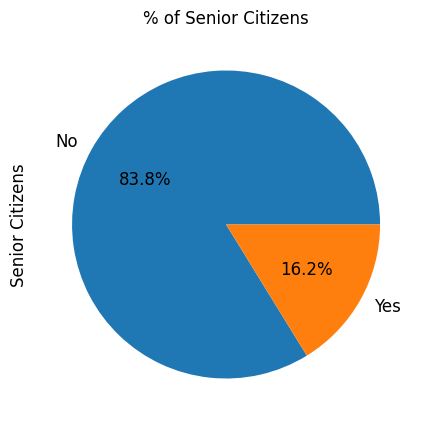

In [15]:
'''
Demographics: % senior citizen. Seems to be mostly young people 
that are using the service.
'''

num_customers = len(telecom_customer_df)
senior_citizen_count = telecom_customer_df['SeniorCitizen'].value_counts()



ax = (senior_citizen_count*100.0 /num_customers)\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)


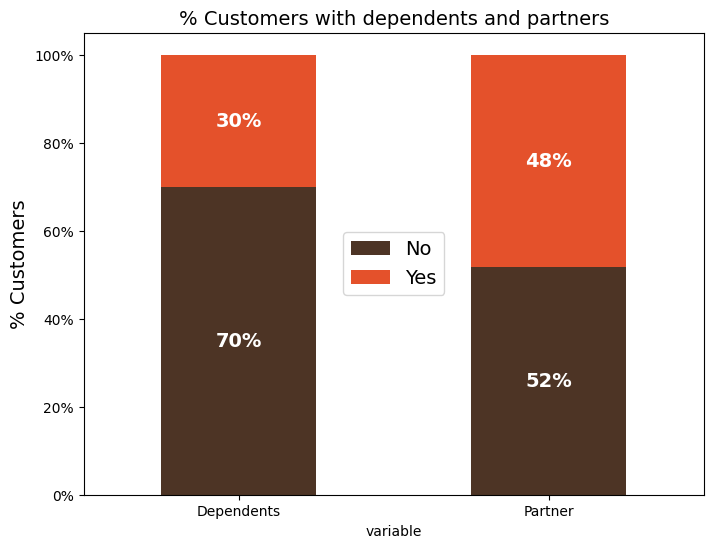

In [26]:
'''
+ Demographics: Percentage of customers that have partners or dependents. SO about 50% of customers have a partner, whilst only 30% of total
customers have dependents.
'''


'''
+ pd.melt: Transforms a DataFrame from a 'wide format' to a 'long format'. 
- id_vars: Specifies which columns to keep as identifiers. So here customerID will be the identifier.
- value_vars: Specifies which columns to 'melt' (unpivot) into a single column.

As a result the DataFrame returned will have three columns.
- customerID: The customer identifier
- variable: A column containing the column being specified 'Dependents' or 'Partner'.
- value: A new column that contains a value that corresponds with either 'Dependents' or 'Partner' column.

When you use pd.melt, it takes the specified columns in 'value' variables and melts them into a single column 'variable'. The value of variable could be 
any of the values in value_vars; this will make sense when you read further. For each customer in the original DataFrame:
1. One row will be created for the 'Dependents' column and its corresponding value. So here you'd have a row with 'customerID', 'variable: Dependents', and value being the value of the Dependents column for that customer.
2. Another row will be created for the 'Partner' column, and its corresponding value.

- Example:
Original data for customer 7590-VHVEG:
customerID	Dependents	Partner
7590-VHVEG	No	Yes

After applying pd.melt, you should see:
customerID	variable	value
7590-VHVEG	Dependents	No
7590-VHVEG	Partner	Yes

Now why are we doing this? It makes it easier to perform computer friendly operations such as grouping, aggregating, or visualizing data. For exmaple, 
if you want to calculate the percentage of customers with or without dependent, or partners, this format makes it a little simpler as everything you need is
in 'variable' and 'value'. So the filter and queries are a little easier.

+ groupby: Put them into different groups based on the values of the 'variable' and 'value' series.
Group 1: variable=Dependents and value = No
Group 2: variable=Dependents and value = Yes
Group 3: variable=Partner and value = No
Group 4: variable=Partner and value = Yes

Remember that doing `df.groupby()` returns a pandas GroupBy object.
- It doesn’t immediately produce any output because it only holds information about how the data is grouped.
- You need to apply an **aggregate operation** (like `size()`, `sum()`, `mean()`, etc.) to get results.
  - size() counts the number of items in each group.
  - sum() adds up the values in each group.
  - mean() calculates the average for each group.
  
This works similarly to SQL's `GROUP BY` clause:
- You define how to group the data and then apply a function to summarize each group.
By using SQL as an analogy, it helps reinforce the idea that `groupby()` splits the data 
into subsets, and then you apply a function to each subset to produce a summarized result. 

So here we're getting the number of rows in each group (customers per group), multiplying by a hundred, then dividing by number of customers 
to get a percentage number such as '54.12' that we can graph. So in the end we should get a DataFrame.
'''

# Reshape the data and calculate percentages
df = pd.melt(telecom_customer_df, id_vars=['customerID'], value_vars=['Dependents', 'Partner']) \
        .groupby(['variable', 'value']).size().unstack() * 100 / len(telecom_customer_df)

# Define colors and create plot the stacked bar chart based on our data frame
ax = df.plot.bar(stacked=True, color=['#4D3425', '#E4512B'], figsize=(8,6), rot=0, width=0.5)

# Format the y-axis and add labels and title
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # Make sure the y-axis is showing things in percents.
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with dependents and partners', size=14)
ax.legend(loc='center', prop={'size':14})

# Add percentage annotations to the bars; here we iterate over the 'patches' (individual rectangles or bars) in our bar plot.
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with height. Here we make sure to put the percentage annotation in the middle
        ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                    ha='center', va='center', color='white', weight='bold', size=14)

plt.show()


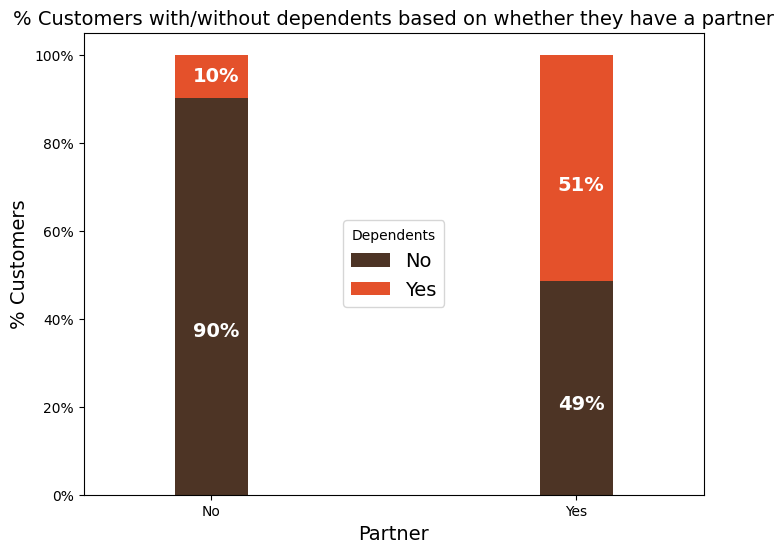

In [9]:
'''
+ Demographics: Let's explore partners and dependents even further. How about looking at the portion of customers who have partners. Does this group also have dependents?
Okay, so among the customers who have a partner, only half of them also have a dependent. Also, as expected, among the customers who don't have a partner, a majority (80%)
don't have dependents either.

- Group by:
Since partner and dependents are both boolean columns, there should be only four possible groups being created by this groupby.

Then we're going to do an aggregate operation and get the number of customers in each group


'''

colors = ['#4D3425','#E4512B']
partner_dependents = telecom_customer_df.groupby(['Partner','Dependents']).size().unstack()


'''
.T: This 'transposes' a DataFrame or Series in Pandas. As a result, we're swapping the rows 
and columns of the DataFrame. So a (3,5) matrix becomes a (5,3). Let's see an example

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

Original df:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

df.T:
   0  1  2
A  1  2  3
B  4  5  6
C  7  8  9

Why are we doing this? Well we want to calculate the sum across. So the 
sum of each row

'''
ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)

# Ensure the graph is formatted for percentages, and also has the necessary outer labels
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

C:\Users\KNguy\AppData\Local\Temp\ipykernel_53008\1909715137.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_customer_df['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

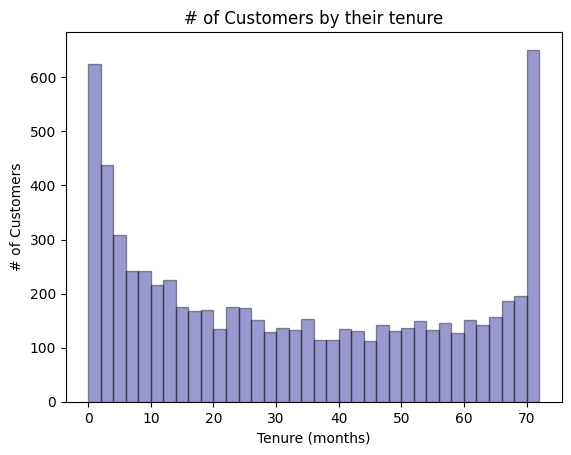

In [10]:
'''
+ Customer Account Information: Let's look at the tenure contract. After 
seeing the data, you'll realize a lot of customers have been with teh company
for just a month, and a lot for 72 months. Could be the idea that they're on different
contracts. Knowing this could find out the reason why so many last for about a month.



'''
ax = sns.distplot(telecom_customer_df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

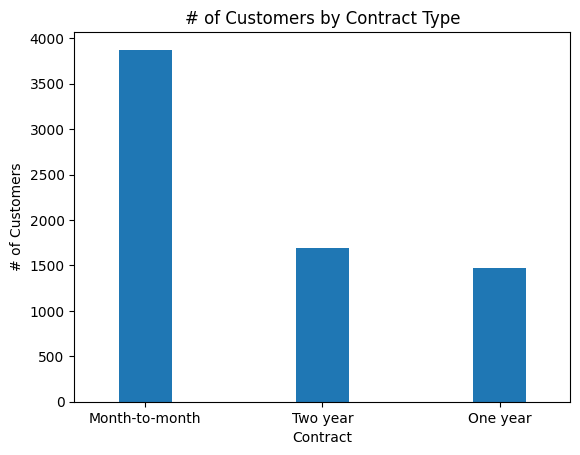

In [12]:
'''
2. Contracts: Let's understand the distribution of the types of contracts
that people get into. So here we see most of the type of contracts 
are month-to-month contracts. While there are an equal number of customers in
the 1 year and 2 year contracts.

Our next step is now to understand the tenure distribution for each type of 
contract. This will involve 3 different plots that we'll look at.
'''
ax = telecom_customer_df['Contract'].value_counts().plot(kind="bar", rot=0, width=0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

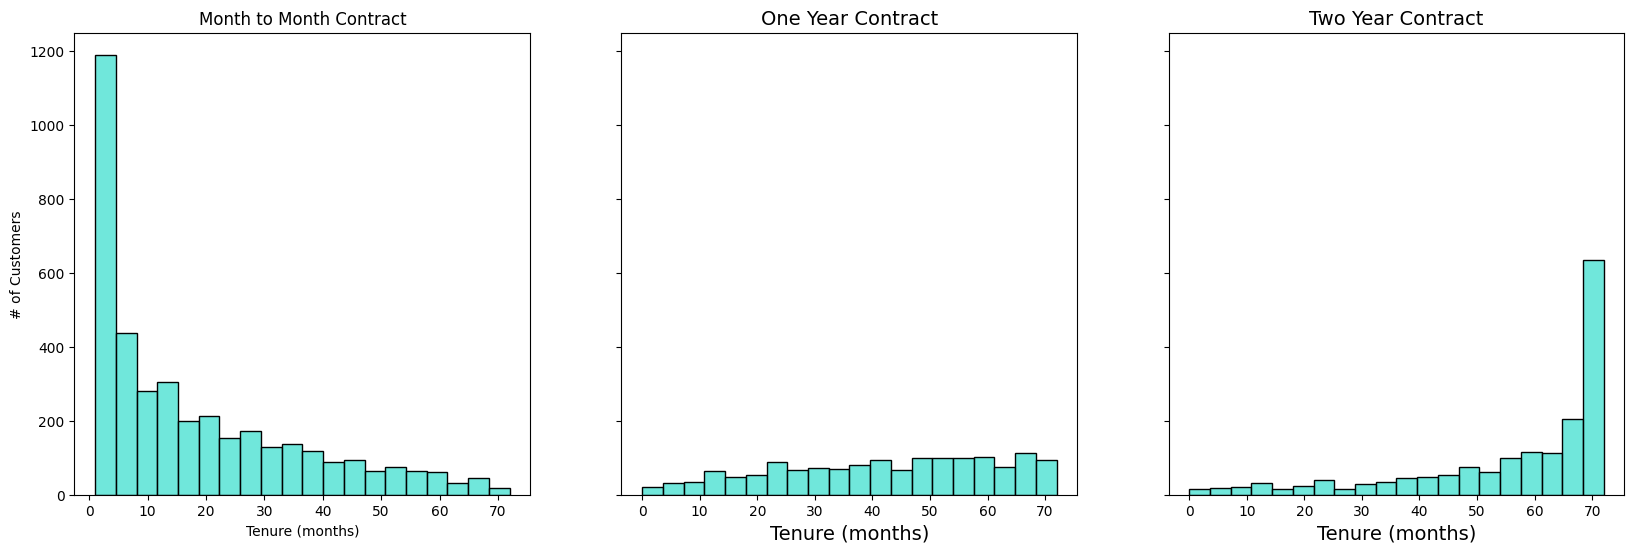

In [15]:
'''
- Contracts analysis continued:

We can see most of the monthly contracts are going to last about 1-2 months, whilst 
the 2 year contracts tend to last for about 70 months. We now know that 
customers that take the longer contract are more loyal, as they tend to stay 
with the company for a relatively longer period of time.
'''
# Create a figure (thing containing the plots) and 3 axes (our 3 plots)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,6))

# Create a histogram plot for graphing the tenure of month-to-month contracts
filter1 = telecom_customer_df['Contract'] == 'Month-to-month'
month_to_month_df = telecom_customer_df[filter1]
ax = sns.histplot(
  month_to_month_df['tenure'], 
  kde=False, 
  bins=int(100/5), 
  color='turquoise',
  ax=ax1  # Assign it to the first plot
)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

# Histogram plot for graphing the second graph
filter2 = telecom_customer_df['Contract'] == 'One year'
one_year_df = telecom_customer_df[filter2]
ax = sns.histplot(
  one_year_df['tenure'], 
  kde=False, 
  bins=int(100/5), 
  color='turquoise',
  ax=ax2 # assign it to the second plot
)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

# Plot the third graph
filter3 = telecom_customer_df['Contract'] == 'Two year'
two_year_df = telecom_customer_df[filter3]
ax = sns.histplot(
  two_year_df['tenure'], 
  kde=False, 
  bins=int(100/5), 
  color='turquoise',
  ax=ax3 # assign it to the second plot
)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)

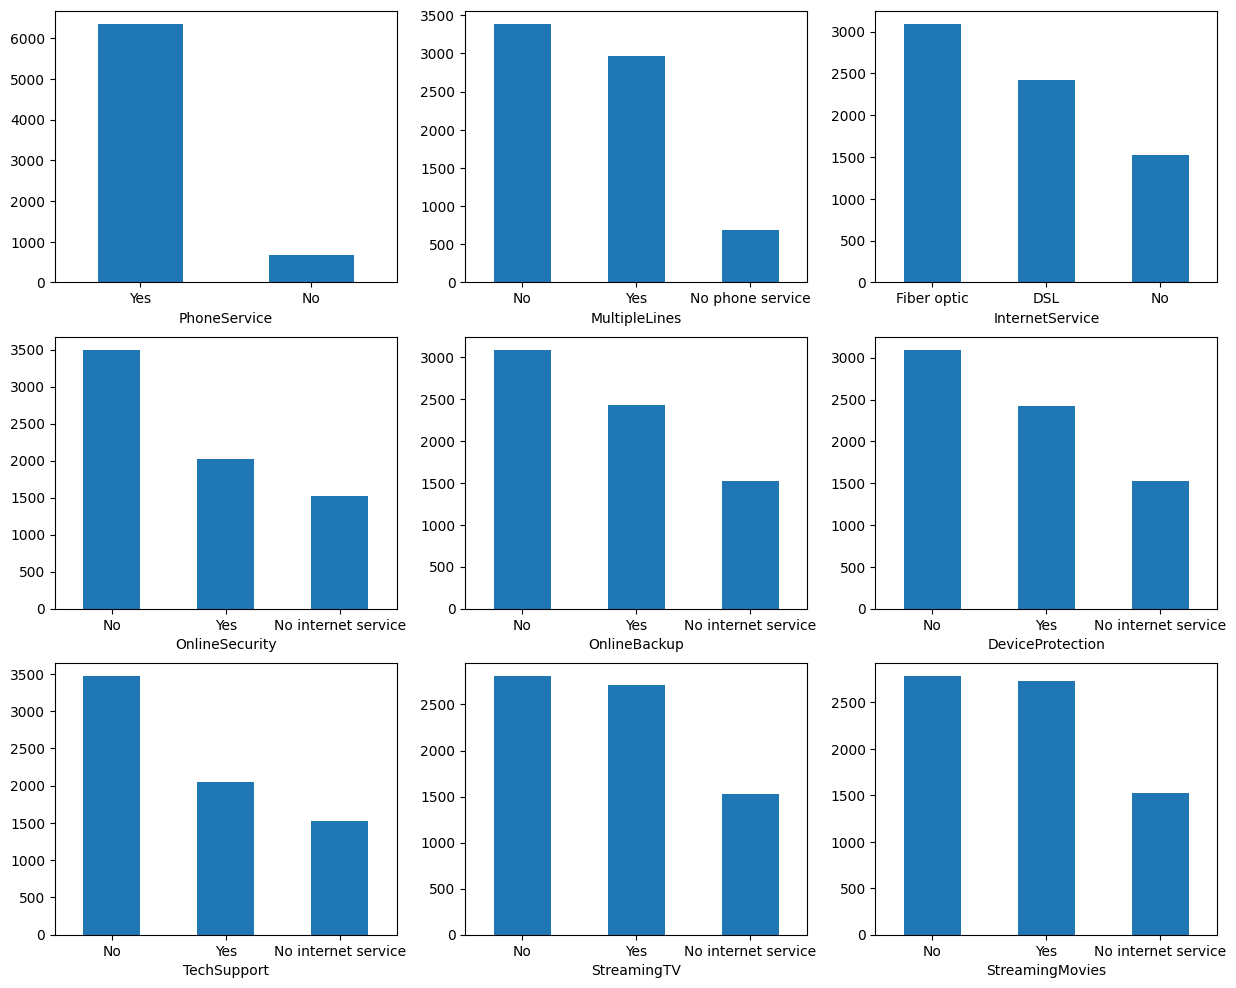

In [8]:
'''
+ Distribution of various company services


'''

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

for i, item in enumerate(services):

  # Compute the row and column for each service
  row = i // 3  # Integer division gives the row
  col = i % 3   # Modulus gives the column
  
  # Plot the value counts on the appropriate axis
  ax = telecom_customer_df[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    





<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

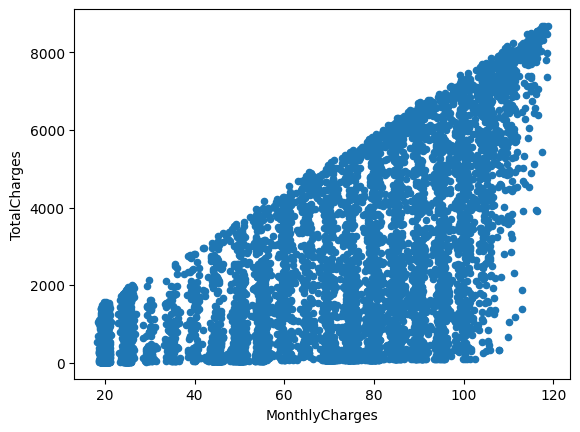

In [12]:
'''
+ Analyze the relationship between monthly and total charges. We
will see that total charges increases as the monthly bill for a 
customer increases. This makes sense.

NOTE: Ensure data is cleaned and proper for the scatter plot. If it wasn't already 
obvious.
'''
telecom_customer_df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

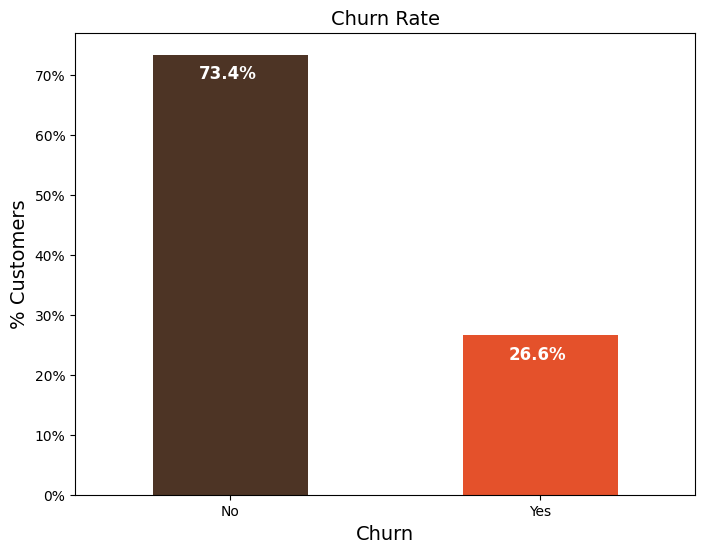

In [17]:
'''
+ Analyzing 'Churn' (predictor variable) and seeing how it played a role 
in interacting with our other important variables in the scatter plot. We'll see that 
about 70% of people don't churn, which is pretty good as it just means they don't quit the service quickly after.
We should note that there is some skewness here, as it's expected the majority of customers won't straight up quit.

Okay now for the final stretch of exploration process, we're going to analyze churn and its relationship with the
other variables. 

'''
colors = ['#4D3425','#E4512B']
ax = (telecom_customer_df['Churn'].value_counts()*100.0 /len(telecom_customer_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar labels using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

<Axes: xlabel='Churn', ylabel='tenure'>

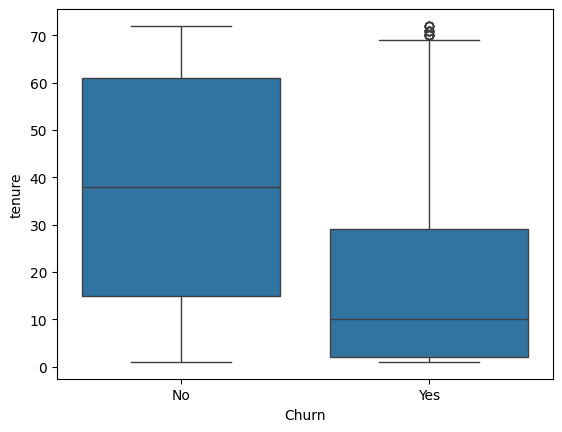

In [18]:


'''
- Churn rate vs:

1. Tenure:


'''

sns.boxplot(x=telecom_customer_df['Churn'], y=telecom_customer_df['tenure'])



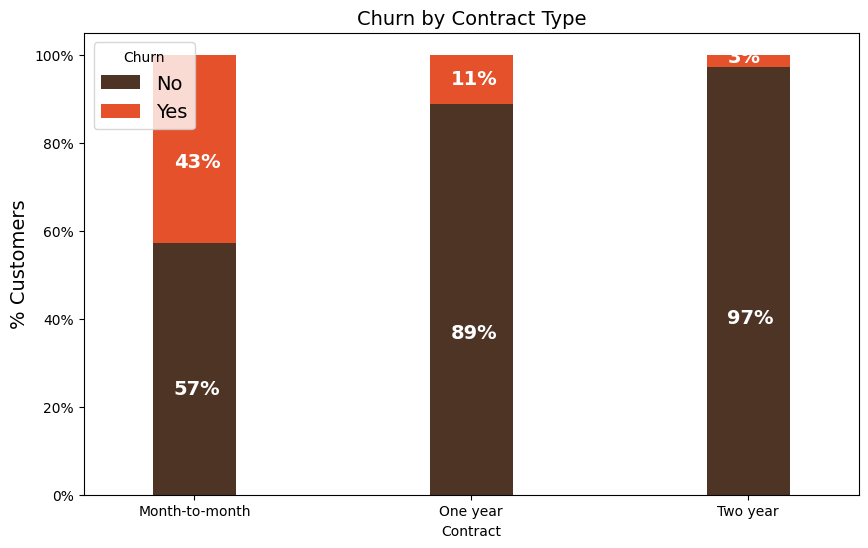

In [35]:
'''
+ Churn and Contract: So create a groupby object that groups rows via their 
Contract AND Churn value. Then find the amount of rows in each group. 
'''
colors = ['#4D3425','#E4512B']
contract_churn = telecom_customer_df.groupby(['Contract','Churn']).size().unstack()
'''
We transpose (with .T) to switch rows and columns because we want the 'Churn' values 
as columns and 'Contract' values as rows. This way, each contract type has its own row,
and the stacked bars will show the churn percentages for each contract type.
'''
ax = (contract_churn.T * 100 / contract_churn.T.sum()).T.plot(kind='bar',width=0.3,stacked=True,rot=0,figsize=(10,6),color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [18]:
'''
+ Churn by seniority: We will see soon that senior citizens have almost double the churn
rate than younger population.

+ Finally explaining Transposing:

- Transposing Definnition
Tranposing a DataFrame swaps its rows and columns. For example, if your original
has SeniorCitizen as rows and 'Churn' as columns. This transpoition will make
'Churn' the rows and the 'SeniorCitizen' the column.

- How the calculation actually changes
1. Without tranposing (seniority_churn.sum())
Without tranposing, we sum along the columns (verically). So the sum of No and  Yes
for each seniority group

# Before transposition
Churn	No	Yes
SeniorCitizen		
0	 4497	1393
1	 666	476

Churn
No     5163; So this is the total amount of people who didn't churn. regardless of seniority
Yes    1869; So this is the total amount of people who did churn. regardless of seniority

2. With transposing (seniority_churn.T.sum()): So it's still vertical, but here we're summing up the votes for senior and non-senior citizens. Regardless of 
whatever their answer was. 
# After tranpose
SeniorCitizen	0	1
Churn		
No	    4497	666
Yes	    1393	476


Here we sum across the rows (horizontally), so this is just  
SeniorCitizen
0    5890
1    1142
'''

colors = ['#4D3425','#E4512B']
seniority_churn = telecom_customer_df.groupby(['SeniorCitizen','Churn']).size().unstack()

seniority_churn_percentage = seniority_churn.T*100.0 / seniority_churn.T.sum()
ax = seniority_churn_percentage.T.plot(kind='bar',
                                        width = 0.2,
                                        stacked = True,
                                        rot = 0, 
                                        figsize = (8,6),
                                        color = colors
                                        )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

SeniorCitizen
0    5890
1    1142
dtype: int64

C:\Users\KNguy\AppData\Local\Temp\ipykernel_18760\2063406542.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_customer_df.MonthlyCharges[no_churn],
C:\Users\KNguy\AppData\Local\Temp\ipykernel_18760\2063406542.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_customer_df.MonthlyCharges[yes_churn],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

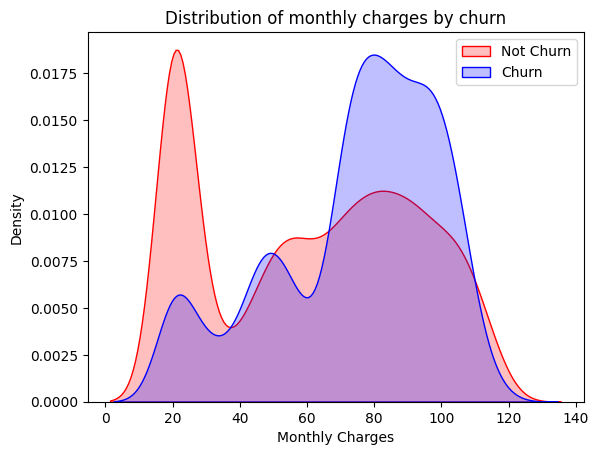

In [30]:
'''
+ Churn by Contract Type: Okay let's look at something a little easier. Here we'll see that customers who have a month-to-month
contract have a very high churn rate.

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
'''
yes_churn = telecom_customer_df['Churn'] == 'Yes'
no_churn = telecom_customer_df['Churn'] == 'No'

ax = sns.kdeplot(telecom_customer_df.MonthlyCharges[no_churn],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_customer_df.MonthlyCharges[yes_churn],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

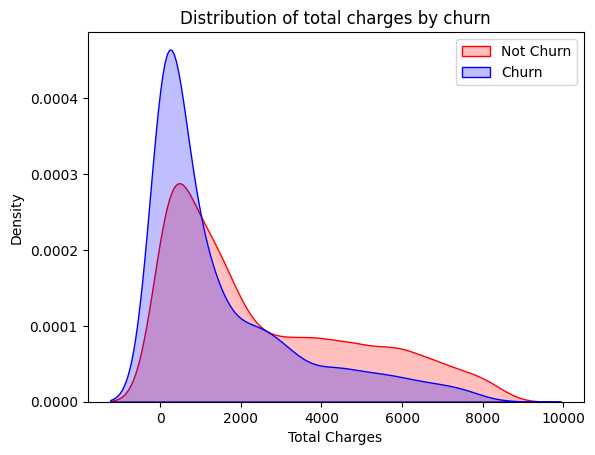

In [8]:
'''
+ Churn by total charges: Looks like there's a higher churn when 
the total charges are lower. 
'''

yes_churn = telecom_customer_df['Churn'] == 'Yes'
no_churn = telecom_customer_df['Churn'] == 'No'

ax = sns.kdeplot(telecom_customer_df['TotalCharges'][no_churn], color="Red", fill=True)
ax = sns.kdeplot(telecom_customer_df['TotalCharges'][yes_churn], color="Blue", fill=True)
ax.legend(['Not Churn', 'Churn'], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## Let's review our data exploration steps
1. Understand the demographics:
  - Gender distribution: Half of our customers are male and half are female.
  - % of senior citizens: Only 16% of our customers are senior citizens, which means most of the people in the data are younger people. 
  - Parnter and dependent status: So about 50% have partners, and about 30% have dependents. Looking a little further, among the people who have a partner, about half also have a dependent. Among the people who don't have a partner, 
2. Understand customer account info:
  - Tenure: There are about as many customers who stay for a month, and customers who stay for 72 months.
  - Contracts: We know that most contracts are month-to-month whilst there are a equal amount of 1 and 2 year contracts.
  - Tenure and contract: We create 3 different graphs for month-to-month, one year, and two year contracts. Here we saw tenure distribution for each contract type. So for month-to-month, most people last about 1-2 months. for a one year contract, it's even tenure, and for 2-year contracts, most people last for about 72 months. 
  - Distribution of services: We created a graphfor each service. For example "PhoneService" and get how many people said 'Yes' or 'No' to using it. These are all categorical variables so we can create easily understandable charts to see how many people use each service.
  - Monthly vs total charges: We'll observe that the total charges increases as the monthly bill for a customer increases.

3. Churn rate vs Everything: 
  - We also look at our 'Churn Rate' which is the main idea of this data. We see that about 73% of customers don't churn which is expected. You probably wouldn't expect most of your customers straight up just leaving.
  - Tenure: Look at the spread of tenure (how many months someone stayed) based on whether someone churned or. So we had two graphs, one for people who didn't and the other for people who did. This one was kind of expected, but yeah the people who didn't churn typically had a higher tenure.
  - Churn by contract type: We saw that most people churned when they took a month-to-month contract, whilst people who took the one or year two contracts, around 90% of them didn't churn.
  - Churn by seniority: About the same, but we saw that senior citizens were more prone to churning, but about a 18% difference.
  - Churn by monthly and total charges: Alright so we saw for monthly charges, if they're higher people are more likely to churn. However, for total charges, people are more likely to churn when they're lower.

## Next you'd create some predictive models
So yeah, after data cleaning and explorational data analysis, you'd create some predictve model. That's kind of outside the scope of what we're trying to learn here, but it's useful to know our entire process.